<a href="https://colab.research.google.com/github/AIGeekProgrammer/MiscellaneousAI/blob/main/NN/ANN_for_function_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook:<br>
ANN to approximate f(x) = x^2 + 2x + 1 function<br>
Author: Szymon Manduk<br>
Created: 18 Apr 2022<br>

In [ ]:
import torch

import torch.nn as nn
import torch.nn.functional as F

from timeit import default_timer as timer

import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
X = torch.rand((200,2))
Y = torch.pow(X[:,0], 2) + 2 * X[:,1] + 1

In [ ]:
X = X.to(device)
Y = Y.to(device)

In [ ]:
X[0:5]

tensor([[0.2482, 0.7838],
        [0.6875, 0.2844],
        [0.6651, 0.2835],
        [0.8287, 0.9860],
        [0.1391, 0.7381]], device='cuda:0')

In [ ]:
Y[0:5]

tensor([2.6292, 2.0415, 2.0095, 3.6587, 2.4956], device='cuda:0')

In [ ]:
print(X[0:3,0], X[0:3,1], Y[0:3], Y.dtype)

tensor([0.2482, 0.6875, 0.6651], device='cuda:0') tensor([0.7838, 0.2844, 0.2835], device='cuda:0') tensor([2.6292, 2.0415, 2.0095], device='cuda:0') torch.float32


In [ ]:
class MyClass(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(2, 8)
    self.output = nn.Linear(8, 1)
  
  def forward(self, x):
    x = self.input(x)
    x = F.relu(x)
    x = self.output(x)
    return x

In [ ]:
model = MyClass().to(device)

In [ ]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-0.4389,  0.2414],
        [-0.1706, -0.1896],
        [ 0.2025,  0.6522],
        [-0.4871, -0.0073],
        [-0.1810, -0.4513],
        [-0.3993, -0.1079],
        [ 0.6319, -0.1478],
        [-0.3966,  0.4285]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.6948, -0.3254,  0.6021, -0.0814,  0.0998, -0.4689, -0.1873, -0.4438],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.2762,  0.0123,  0.3434, -0.3112, -0.2451, -0.1171,  0.3008, -0.2264]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0758], device='cuda:0', requires_grad=True)


In [ ]:
model.input.weight

Parameter containing:
tensor([[-0.4389,  0.2414],
        [-0.1706, -0.1896],
        [ 0.2025,  0.6522],
        [-0.4871, -0.0073],
        [-0.1810, -0.4513],
        [-0.3993, -0.1079],
        [ 0.6319, -0.1478],
        [-0.3966,  0.4285]], device='cuda:0', requires_grad=True)

In [ ]:
model.input.bias

Parameter containing:
tensor([-0.6948, -0.3254,  0.6021, -0.0814,  0.0998, -0.4689, -0.1873, -0.4438],
       device='cuda:0', requires_grad=True)

In [ ]:
# loss, optim, training loop
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.001)
epochs = 25000

In [ ]:
start = timer()
losses = []
for epoch in range(epochs):
  optim.zero_grad()
  y_hat = model.forward(X)
  loss = criterion(y_hat, Y.unsqueeze(1))
  loss.backward()
  optim.step()
  losses.append(loss.detach().cpu().numpy())
end = timer()

In [ ]:
print(f'Final loss after {epochs} epochs: {loss:.4f}. Training time on {device}: {end-start:.2f} seconds.')

Final loss after 25000 epochs: 0.0023. Training time on cuda: 30.58 seconds.


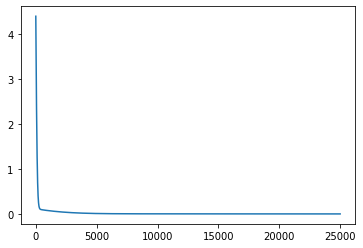

In [ ]:
plt.plot(losses)

In [ ]:
x_test = torch.tensor([0.2, 0.3]).to(device)

In [ ]:
x_test

tensor([0.2000, 0.3000], device='cuda:0')

In [ ]:
actual = torch.pow(x_test[0], 2) + 2 * x_test[1] + 1
print(f'Correct result: {actual:.4f}')

Correct result: 1.6400


In [ ]:
prediction = model.forward(x_test)

In [ ]:
print(f'Predicted value: {prediction.item():.4f}. Difference: {(abs(actual.item() - prediction.item()) / actual.item())*100:.2f}%')

Predicted value: 1.6480. Difference: 0.49%
